In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201601.gz', '../BL_Work/openPrescribe/serialized/201602.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201012.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201010.gz']


In [3]:
pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
pdp.dropna()
for month in [ '201602' , '201603']:
    file_path  = '../BL_Work/openPrescribe/serialized/' + month + '.gz'
    pdp2 = pd.read_csv(file_path,compression='gzip')
    pdp2.dropna()
    pdp.append(pdp2)
    

In [4]:
pdp.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1962,Q44,01C,N81002,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,1.0,3.35,3.11,500.0,...,SK9 1PA,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0
1,1963,Q44,01C,N81002,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1.0,2.99,2.77,500.0,...,SK9 1PA,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0
2,1964,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,4.0,30.72,28.42,3000.0,...,SK9 1PA,NaN,NaN,NaN,NaN,0.0,0101021B0,3000.0,1.0,3000.0
3,1965,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2.0,9.21,8.53,180.0,...,SK9 1PA,NaN,NaN,NaN,NaN,500.0,0101021B0,180.0,1.0,180.0
4,1966,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2.0,20.10,18.59,1500.0,...,SK9 1PA,NaN,NaN,NaN,NaN,0.0,0101021B0,1500.0,1.0,1500.0


In [5]:
# pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
# pdp.dropna()


In [6]:
set(pdp['12'])

{nan,
 "Meniere's disease",
 'bipolar',
 "crohn's disease",
 'dementia',
 'depression',
 'diabetes',
 'gastroparesis',
 'hypothyroidism',
 'interstitial cystitis',
 'irritable bowel syndrome',
 'parkinson',
 'psoriasis',
 'rheumatoid',
 'sleep apnea'}

In [7]:
disease_drugs = json.load(open("Disease_Drug_DrugBank.json",'rb'))

In [8]:
# pdp.head(n=1000)

In [9]:
ward_pop = pd.read_csv('ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
ward_pop.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [11]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [12]:
GP_META.head()

,BP_code,Name,Grouping,National_geo,Addr1,Addr2,Addr3,Addr4,Addr5,Postcode,...,Contact,Null1,Null2,Null3,Amended,Null4,Provider,Null5,Setting,Null6
0,A81001,THE DENSHAM SURGERY,Y63,Q74,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,NaN,TS18 1HU,...,01642 672351,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
1,A81002,QUEENS PARK MEDICAL CENTRE,Y63,Q74,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,NaN,TS18 2AW,...,01642 679681,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
2,A81003,VICTORIA MEDICAL PRACTICE,Y54,Q74,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,NaN,TS26 8DB,...,01429 272945,NaN,NaN,NaN,0,NaN,00K,NaN,4,NaN
3,A81004,BLUEBELL MEDICAL CENTRE,Y63,Q74,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,NaN,NaN,TS5 8SB,...,01642 827697,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN
4,A81005,SPRINGWOOD SURGERY,Y63,Q74,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,NaN,TS14 7DJ,...,01287 619611,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN


In [13]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [14]:
len(Open_filtered_GPs)

6924

In [16]:
%store Open_filtered_GPs

Stored 'Open_filtered_GPs' (dict)


In [17]:
pdp = pdp[pdp['2'].isin(Open_filtered_GPs.keys())]

In [18]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))
    

In [19]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [20]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
ward_df.head()

,pcd7,pcd8,pcds,par11cd,par11nm,par11nmw,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
0,AL1 1AG,AL1 1AG,AL1 1AG,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
1,AL1 1AJ,AL1 1AJ,AL1 1AJ,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
2,AL1 1AR,AL1 1AR,AL1 1AR,NaN,NaN,NaN,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
3,AL1 1AS,AL1 1AS,AL1 1AS,NaN,NaN,NaN,E05004799,St Peters,NaN,E07000100,St Albans,NaN
4,AL1 1BH,AL1 1BH,AL1 1BH,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN


In [22]:
ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

In [23]:
%store -r ward_patients_filtered

no stored variable ward_patients_filtered


In [23]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [24]:
disease = list(set(pdp[pd.notnull(pdp['12'])]['12']))
print disease

['psoriasis', "Meniere's disease", "crohn's disease", 'gastroparesis', 'irritable bowel syndrome', 'parkinson', 'sleep apnea', 'interstitial cystitis', 'bipolar', 'hypothyroidism', 'dementia', 'rheumatoid', 'depression', 'diabetes']


In [120]:
symptom = list(set(pdp[pd.notnull(pdp['13'])]['13']))
print symptom

['psoriasis', "Meniere's disease", "crohn's disease", 'gastroparesis', 'irritable bowel syndrome', 'parkinson', 'sleep apnea', 'interstitial cystitis', 'bipolar', 'hypothyroidism', 'dementia', 'rheumatoid', 'depression', 'diabetes']


In [25]:
All_drug_count = {}
for name, group in tqdm(pdp.groupby('2')):
    all_drugs = np.sum(group['5'])
    if name in LSOA_dist:
        for k in LSOA_dist[name]:
            if k not in All_drug_count:
                All_drug_count[k] = 0.0
            All_drug_count[k]+= float(all_drugs)*float(LSOA_dist[name][k])

100%|██████████| 6893/6893 [00:03<00:00, 1905.59it/s]


In [616]:
# %store All_drug_count

In [256]:
LSOA_disease_drug_count = {}
for d in tqdm(disease):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_disease_drug_count:
        LSOA_disease_drug_count[d]={}
    for name, group in tqdm(pdp.groupby('2')):
        if name in LSOA_dist:
            disease_presc = group[group['12']==d]
            disease_count = np.sum(disease_presc['5'])
            for k in LSOA_dist[name]:
                if k not in LSOA_disease_drug_count[d]:
                    LSOA_disease_drug_count[d][k] = 0.0
                LSOA_disease_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

 32%|███▏      | 2204/6893 [00:03<00:06, 708.71it/s]


 36%|███▌      | 5/14 [00:40<01:12,  8.02s/it]3it/s]Exception in thread Thread-26:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 151, in run
    if instance.miniters > 1 and \
AttributeError: 'tqdm' object has no attribute 'miniters'


 61%|██████▏   | 4236/6893 [00:04<00:03, 855.16it/s]


 93%|█████████▎| 6390/6893 [00:07<00:00, 882.22it/s]


100%|██████████| 14/14 [01:52<00:00,  8.04s/it]it/s]


In [257]:
LSOA_symptom_drug_count = {}
for d in tqdm(symptom):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_symptom_drug_count:
        LSOA_symptom_drug_count[d]={}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['13']==d]
            disease_count = np.sum(disease_presc['5'])
            for k in LSOA_dist[name]:
                if k not in LSOA_symptom_drug_count[d]:
                    LSOA_symptom_drug_count[d][k] = 0.0
                LSOA_symptom_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

100%|██████████| 27/27 [04:14<00:00,  9.42s/it]


In [215]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [216]:
Ward_patients

{u'E01014080': 1086.4196375767372,
 u'E01014081': 1075.1437672371826,
 u'E01014082': 1102.173557840639,
 u'E01014083': 695.4050408858674,
 u'E01014084': 715.6252891115535,
 u'E01014085': 695.7417088066288,
 u'E01014086': 999.8817138579359,
 u'E01014087': 508.1149928877555,
 u'E01014088': 532.9192180305364,
 u'E01014089': 637.2739109372905,
 u'E01015977': 1899.9472349843581,
 u'E01015976': 1689.8615608700502,
 u'E01015975': 1542.8796987541018,
 u'E01015974': 1385.0207714300668,
 u'E01015973': 2278.5314295956805,
 u'E01015972': 1779.3696674894773,
 u'E01015971': 1545.4540319245316,
 u'E01015970': 1370.8096642005037,
 u'E01015979': 1388.9450800078616,
 u'E01015978': 1295.2068547234182,
 u'E01010259': 1230.2561999851468,
 u'E01010258': 1345.5448634834142,
 u'E01010251': 1520.774250205639,
 u'E01010250': 1417.8178077590765,
 u'E01010253': 1285.383067412056,
 u'E01010252': 1820.7568342553661,
 u'E01010255': 1459.895043117762,
 u'E01010254': 1563.3766201800588,
 u'E01010257': 1233.71216057462

In [217]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [218]:
df.head()

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5


In [219]:
len(set(df['WD15CD']))

8335

In [220]:
len(df['WD15CD'].unique())

8335

In [221]:
wardMap = {}
for name , group in df.groupby('LAD15CD'):
    wardMap[name] = list(group['LSOA11CD'])

In [224]:
# wardMap

In [225]:
# LSOA_disease_drug_count[d].keys()

In [174]:
store -r district_pop

In [226]:
len(wardMap.keys())

348

In [227]:
total = 0
for k in wardMap:
    total+=len(wardMap[k])
print total

34753


In [228]:
symptomList= pd.read_csv("../BL_Work/Dis_sym_edited.csv")
symptomList.head()
normId = {}
for index , row in symptomList.iterrows():
    normId[row['norm_UID'].strip()] = row['UID']

In [250]:
prevalence_UK = {}
for d in tqdm(disease):
    if d not in prevalence_UK:
        prevalence_UK[d] = {}
    for k in wardMap:
        commonKeys = list(set(wardMap[k]).intersection(LSOA_disease_drug_count[d].keys()))
        for lsoa in commonKeys:
            disease_presc = np.sum([LSOA_disease_drug_count[d][lsoa] for w in wardMap[k] if not np.isnan(LSOA_disease_drug_count[d][lsoa])])
            ward_patient_pop = np.sum([Ward_patients[lsoa] for w in wardMap[k] if not np.isnan(Ward_patients[lsoa])])
            prev = float(disease_presc)/float(All_count)
            if prev > 1:
                continue
            prevalence_UK[d][k] = prev


100%|██████████| 14/14 [02:33<00:00, 11.00s/it]


In [201]:
prevalence_UK

{"Meniere's disease": {'E06000001': 0.0025001814320697786,
  'E06000002': 0.0,
  'E06000003': 0.0036797632073705604,
  'E06000004': 0.004110430721066211,
  'E06000005': 0.002626023325505979,
  'E06000006': 0.0027745277998768776,
  'E06000007': 0.0035041503946436027,
  'E06000008': 0.0,
  'E06000009': 0.003174370107589072,
  'E06000010': 0.0056237397504572476,
  'E06000011': 0.005516948002374699,
  'E06000012': 0.0,
  'E06000013': 0.005398343114745192,
  'E06000014': 0.0021487514465312993,
  'E06000015': 0.004824304028453517,
  'E06000016': 0.0,
  'E06000017': 0.0004643859777689181,
  'E06000018': 0.0,
  'E06000019': 0.0027946023139007077,
  'E06000020': 0.002478419555321926,
  'E06000021': 0.005315518564576913,
  'E06000022': 0.0,
  'E06000023': 0.0,
  'E06000024': 0.001693050118496169,
  'E06000025': 0.0028810161534488245,
  'E06000026': 0.0033496580104438152,
  'E06000027': 0.0012034634021589107,
  'E06000028': 0.002393711811211057,
  'E06000029': 0.00175061941712834,
  'E06000030': 

In [194]:
LSOA_disease_drug_count

{"Meniere's disease": {u'E01009300': nan,
  u'E01014080': 4.53905990363736,
  u'E01014081': 2.852912539095074,
  u'E01014082': 2.893665106490367,
  u'E01014083': 2.345729082212173,
  u'E01014084': 2.379407197018815,
  u'E01014085': 2.3381931329288386,
  u'E01014086': 3.3129285558037855,
  u'E01014087': 1.6966568041676509,
  u'E01014088': 1.7802861911405865,
  u'E01014089': 2.1395743230421798,
  u'E01015977': 3.895392168668995,
  u'E01015976': 8.167168156026152,
  u'E01015975': 3.8044450802037173,
  u'E01015974': 3.3197289481571284,
  u'E01015973': 9.681271079057929,
  u'E01015972': 8.533121299173406,
  u'E01015971': nan,
  u'E01015970': 3.183474125873283,
  u'E01015979': 3.0531243656144547,
  u'E01015978': nan,
  u'E01010259': nan,
  u'E01010258': nan,
  u'E01010251': 6.960762706122192,
  u'E01010250': 6.7833355843364505,
  u'E01010253': 6.29449851228955,
  u'E01010252': 8.880089188967812,
  u'E01010255': 5.31627738154615,
  u'E01010254': 7.787948978582953,
  u'E01010257': 4.4773910145

In [213]:
prevalence_Symptom_UK = {}
for d in tqdm(symptom):
    if d not in prevalence_Symptom_UK:
        prevalence_Symptom_UK[d] = {}
    for k in wardMap:
        commonKeys = list(set(LSOA_symptom_drug_count[d].keys()).intersection(wardMap[k]))
        
        for lsoa in commonKeys:
            disease_presc = np.sum([LSOA_symptom_drug_count[d][lsoa] for w in wardMap[k] if not np.isnan(LSOA_symptom_drug_count[d][lsoa])])
            ward_patient_pop = np.sum([Ward_patients[lsoa] for w in wardMap[k] if not np.isnan(Ward_patients[lsoa])])
            prev = float(disease_presc)
            if prev > 1:
                prev = np.mean([LSOA_symptom_drug_count[d][lsoa] for w in wardMap[k] if not np.isnan(LSOA_symptom_drug_count[d][lsoa])])
            prevalence_Symptom_UK[d][k] = prev

  0%|          | 0/27 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [143]:
prevalence_UK

{"Meniere's disease": {'E06000001': 0.004196624459116399,
  'E06000002': 0.0,
  'E06000003': 0.005743434495566171,
  'E06000004': 0.0027007556263441077,
  'E06000005': 0.004256972384671191,
  'E06000006': 0.003612463432194557,
  'E06000007': 0.0031697293592303365,
  'E06000008': 0.0,
  'E06000009': 0.00405253552013095,
  'E06000010': 0.004759020721155282,
  'E06000011': 0.003229542763018741,
  'E06000012': 0.0,
  'E06000013': 0.005581971215182577,
  'E06000014': 0.0032420500840015065,
  'E06000015': 0.0019976272161242223,
  'E06000016': 0.0,
  'E06000017': 0.0024338029109878443,
  'E06000018': 0.0,
  'E06000019': 0.003536149166593058,
  'E06000020': 0.00663165832045031,
  'E06000021': 0.003704523875004764,
  'E06000022': 0.0,
  'E06000023': 0.0,
  'E06000024': 0.0037458501770756794,
  'E06000025': 0.0016837142976715797,
  'E06000026': 0.0018957053017769727,
  'E06000027': 0.0020376206558588967,
  'E06000028': 0.00220099135918042,
  'E06000029': 0.0012074317549883842,
  'E06000030': 0.0

In [178]:
%store -r prevalence_UK_GT

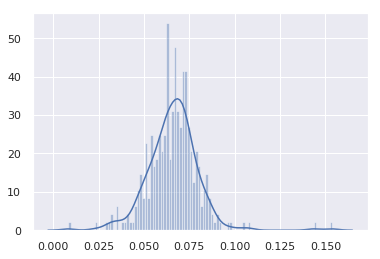

In [251]:
sns.distplot(prevalence_UK_GT['DM'].values(),bins=100)

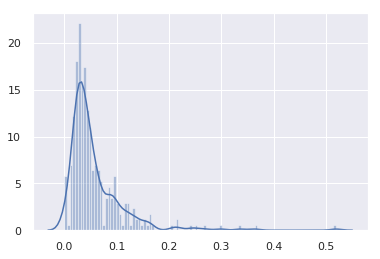

In [252]:
sns.distplot(prevalence_UK['diabetes'].values(),bins=100)

In [253]:
len(prevalence_UK['diabetes'])

331

In [254]:
commonWards_UK = set(prevalence_UK['diabetes'].keys()).intersection(prevalence_UK_GT['DM'].keys())

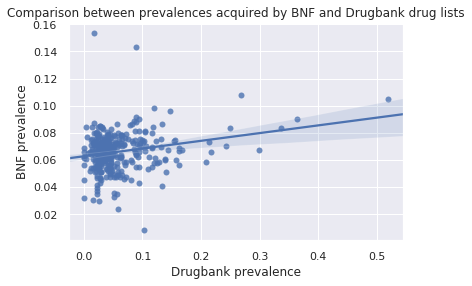

In [255]:
sns.regplot([ prevalence_UK['diabetes'][k] for k in commonWards_UK],[prevalence_UK_GT['DM'][k] for k in commonWards_UK])
ax = plt.gca()
ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
ax.set_xlabel("Drugbank prevalence")
ax.set_ylabel("BNF prevalence")

In [245]:
pearsonr([ prevalence_UK['diabetes'][k] for k in commonWards_UK],[prevalence_UK_GT['DM'][k] for k in commonWards_UK])

(0.18742718811430703, 0.0006092520059700578)